In [34]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re #regular expressions
import os
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import spacy
import pyLDAvis.gensim_models
import en_core_web_md #sm/md/lg size
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords

# Increase width of columns on dataframe
pd.set_option('display.max_colwidth', None)
# Visualise inside a notebook
pyLDAvis.enable_notebook()

In [2]:
# Import the spaCy model
nlp = en_core_web_md.load()

In [3]:
# Import training dataset
df_train = pd.read_csv('../input/nlp-getting-started/train.csv')
df_train.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [4]:
# Info of training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
landing_df_train = df_train.copy()

In [6]:
landing_df_train.index.sort_values()
landing_df_train.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [7]:
landing_df_train.sort_index()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


In [8]:
#Transforming DataFrame into array
landing_df_train.values

array([[1, nan, nan,
        'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
        1],
       [4, nan, nan, 'Forest fire near La Ronge Sask. Canada', 1],
       [5, nan, nan,
        "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
        1],
       ...,
       [10871, nan, nan,
        'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
        1],
       [10872, nan, nan,
        'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
        1],
       [10873, nan, nan,
        'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d',
        1]], dtype=object)

In [9]:
#unique values for the location column
print(len(landing_df_train['location'].unique()))

3342


In [10]:
len(landing_df_train.pivot_table(index=['location'],aggfunc='size'))


3341

In [11]:
landing_df_train[['target', 'location']]

,target,location
0,1,NaN
1,1,NaN
2,1,NaN
3,1,NaN
4,1,NaN
...,...,...
7608,1,NaN
7609,1,NaN
7610,1,NaN
7611,1,NaN


In [12]:
landing_df_train.shape

(7613, 5)

In [31]:
#we remove the punctuation for each tweet
landing_df_train['text'] = landing_df_train['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [32]:
landing_df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orders in California,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school,1


In [36]:
#stopwords set defined
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jose/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
print(stop_words)

{'too', 'my', 'don', 'me', 'these', 'now', 'their', 'into', "you've", 'if', 'but', 'before', 'am', 'isn', 'been', 'how', 'over', 'above', "didn't", 'weren', 'has', 'have', 'ours', 'yourselves', 'we', 'further', 'doesn', 'all', 'haven', 'for', 'themselves', 'as', 'ain', "wouldn't", 'herself', 'couldn', 'this', 't', "mustn't", 'from', 'wouldn', 'do', 'once', 'each', 'any', 'our', 'd', 'while', 'or', 'had', 'and', 'you', 'why', 'did', 'mustn', 'up', "haven't", 'he', 'are', 'than', 'shan', 'myself', 'yours', 'because', 'mightn', 'y', 'his', 'hasn', 'they', "it's", 'nor', 'being', 'shouldn', 'other', "aren't", 'both', "shan't", 've', "you're", 'what', 'will', 'himself', 'does', "you'd", 'then', 'those', 'were', 's', "hasn't", 'having', 'during', 'some', "should've", 'needn', 'an', 'off', 'here', 'few', "weren't", 'theirs', 'hers', "couldn't", 'who', 'more', 'just', 'where', "shouldn't", 'it', 'in', 'by', 'after', 'such', 'her', 'that', 'so', 'of', 'against', 'through', 'your', 'she', 'to', 

In [38]:
landing_df_train['text'] = landing_df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


In [39]:
landing_df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Deeds Reason earthquake May ALLAH Forgive us,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,residents asked shelter place notified officers evacuation shelter place orders expected,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orders California,1
4,7,NaN,NaN,got sent photo Ruby Alaska smoke wildfires pours school,1


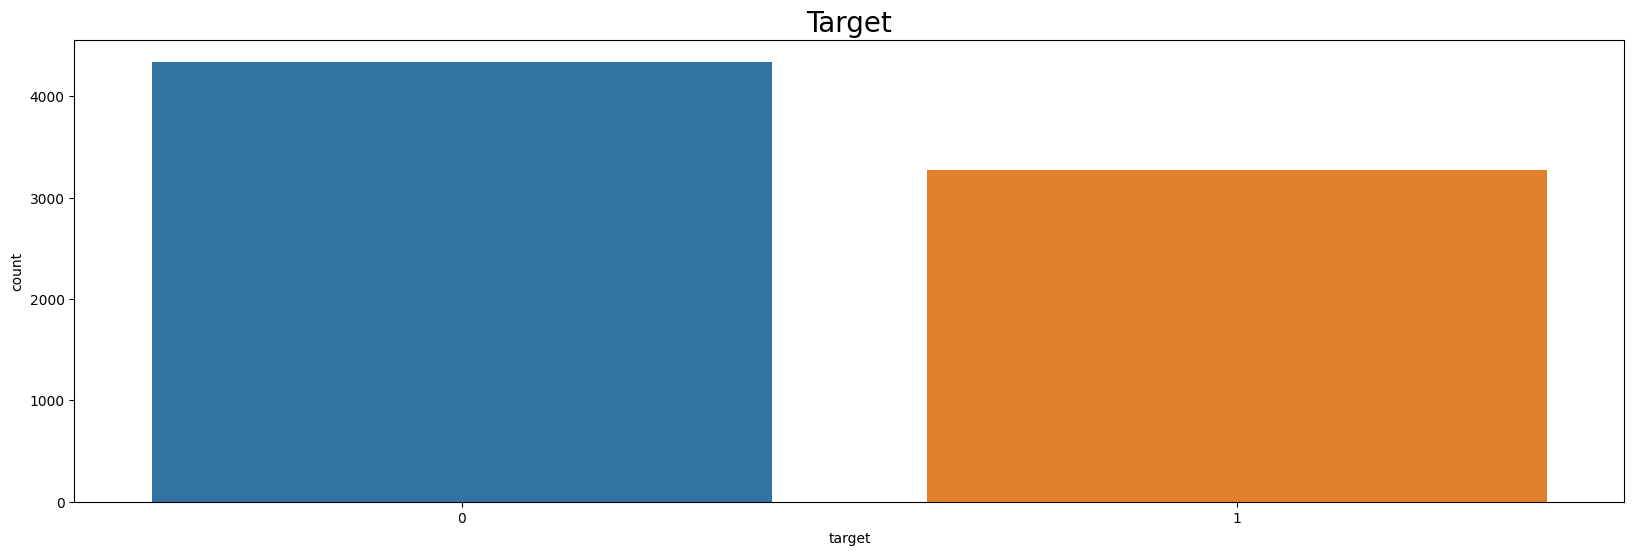

In [14]:
# Check if data is balanced
plt.figure(figsize=(20, 6))
ax = sns.countplot(x=df_train["target"])
ax.set_title("Target", fontsize=20)
plt.show()

In [15]:
# Check different keywords
df_train["keyword"].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [16]:
# Checking one non disaster tweet
df_train.iloc[32]

id                                                                           49
keyword                                                                  ablaze
location                                          Est. September 2012 - Bristol
text        We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw
target                                                                        0
Name: 32, dtype: object

In [17]:
# Checking one disaster tweet
df_train.iloc[33]

id                                                                                          50
keyword                                                                                 ablaze
location                                                                                AFRICA
text        #AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi
target                                                                                       1
Name: 33, dtype: object

In [18]:
# Checking one disaster tweet
df_train.iloc[31]

id                                                               48
keyword                                                      ablaze
location                                                 Birmingham
text        @bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
target                                                            1
Name: 31, dtype: object

In [19]:
# Converting tweets to Spacy docs
tweet_non_disaster = nlp(df_train.iloc[32]['text'])
tweet_disaster_1 = nlp(df_train.iloc[31]['text'])
tweet_disaster_2 = nlp(df_train.iloc[33]['text'])

In [20]:
# Comparing similarities disaster vs non disaster
print(tweet_disaster_1,"<->",tweet_non_disaster,tweet_disaster_1.similarity(tweet_non_disaster))

@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C <-> We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw 0.23727926195159454


In [21]:
# Comparing similarities disaster vs disaster
print(tweet_disaster_1,"<->",tweet_disaster_2,tweet_disaster_1.similarity(tweet_disaster_2))

@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C <-> #AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi 0.40555911607955897


In [22]:
# Checking properties of token
for token in tweet_disaster_2:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

# # SYM $ nmod # False False
AFRICANBAZE AFRICANBAZE NOUN NNS ROOT XXXX True False
: : PUNCT : punct : False False
Breaking break VERB VBG amod Xxxxx True False
news news NOUN NN ROOT xxxx True False
: : PUNCT : punct : False False
Nigeria Nigeria PROPN NNP appos Xxxxx True False
flag flag NOUN NN npadvmod xxxx True False
set set VERB VBN acl xxx True False
ablaze ablaze NOUN NN dobj xxxx True False
in in ADP IN prep xx True True
Aba Aba PROPN NNP pobj Xxx True False
. . PUNCT . pobj . False False
http://t.co/2nndBGwyEi http://t.co/2nndBGwyEi PROPN NNP punct xxxx://x.xx/dxxxXXxxXx False False


In [23]:
# Check different words on Tweets
# initialize CountVectorizer






ctv = CountVectorizer(tokenizer=word_tokenize,token_pattern=None)

In [24]:
# Create corpus with disaster tweets
corpus_disaster = df_train[df_train['target'] ==1]['text']

In [25]:
#Removing stopwords
removal= ['PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM', 'AUX', 'SCONJ']

In [26]:
#Tokenization
tokens = []
for summary in nlp.pipe(corpus_disaster):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

In [27]:
# fit the vectorizer on corpus
ctv.fit(corpus_disaster)
corpus_transformed = ctv.transform(corpus_disaster)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/jose/nltk_data'
    - '/home/jose/NLP-with-Disaster-Tweets/venv/nltk_data'
    - '/home/jose/NLP-with-Disaster-Tweets/venv/share/nltk_data'
    - '/home/jose/NLP-with-Disaster-Tweets/venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
# Vocabulary of words most repeated on Tweets
print(ctv.vocabulary_)

In [ ]:
corpus_disaster.head()

In [ ]:
# Create corpus with non disaster tweets
corpus_no_disaster = df_train[df_train['target'] == 0]['text']

In [ ]:
# fit the vectorizer on corpus
ctv.fit(corpus_no_disaster)
corpus_transformed = ctv.transform(corpus_no_disaster)

In [ ]:
print(ctv.vocabulary_)

In [ ]:
# Try to find disasters based on some key words
for i in range(len(df_train['text'])):
    if 'earthquake' in df_train['text'][i] or 'hurricane' in df_train['text'][i] or 'flood' in df_train['text'][i] or 'tsunami' in df_train['text'][i] or 'tornado' in df_train['text'][i] or 'wildfire' in df_train['text'][i]:
        print('Disaster found in ' + str(i))

In [ ]:
# Try to find disasters based on some hashtags
for i in range(len(df_train['text'])):
    if '#disaster' in df_train['text'][i] or '#nature' in df_train['text'][i] or '#tsunami' in df_train['text'][i] or '#covid' in df_train['text'][i] or '#earthquake' in df_train['text'][i] or '#naturaldisaster' in df_train['text'][i] or '#disasterrelief' in df_train['text'][i] or '#gempabumi' in df_train['text'][i] or '#emergency' in df_train['text'][i] or '#fire' in df_train['text'][i] or '#love' in df_train['text'][i] or '#disastermanagement' in df_train['text'][i] or '#bencanaalarm' in df_train['text'][i]:
        print('Hashtag found in ' + str(i))

In [ ]:
hashtags = re.sub(" ",',',"#disaster #nature #tsunami #covid #earthquake #naturaldisaster #disasterrelief #flood #bencana #indonesia #disasterpreparedness #gempabumi #emergency #fire #love #disastermanagement #bencanaalam #hurricane #disasterrecovery #help #earth #gempa #bhfyp #life #disasterresponse #climatechange #disasters #tsunamipalu #viral #world")

In [ ]:
print(hashtags.split(',')[0])
    

In [ ]:
print(hashtags[0])

In [ ]:
hashtags2 = re.sub(" ",',',"#banjir #photography #chernobyl #storm #water #likuifaksi #floods #india #megatsunami #waterdamage #instagram #tsunamiwarning #gunungmeletus #bmkg #art #longsor #tornado #siagabencana #tsunamiaceh #terremoto #coronavirus #emergencypreparedness #rain #survival #news #safety #bnpb #rescue #history #flooding")

In [ ]:
k=0
hashtags_disaster = []
for i in hashtags.split(','):
    for j in df_train['text']:
        if i in j:
            hashtags_disaster.append(k)
        k=k+1
    

In [ ]:
disaster = []
for i in range(len(df_train['text'])):
    if df_train['target'][i]==1:
        disaster.append(i)

In [ ]:
overlap_disaster = []
for i in disaster:
    if i in hashtags_disaster:
        overlap_disaster.append(i)
        

In [ ]:
len(hashtags_disaster)

In [ ]:
len(overlap_disaster)

In [ ]:
my_list = [1, 2, 3]
[i for i in my_list if i==2]

In [ ]:
#df_train['text'].values.tolist()
df_train['text'].unique()

In [ ]:
df_train.sort_values(by="target", ascending=False, inplace=True)

In [ ]:
df_train.head(10)

In [ ]:
df_train.isna().sum()

In [ ]:
df_train['target'].value_counts()

In [ ]:
y=df_train['target'].values
y.shape

In [ ]:
x=df_train['text'].values
x.shape

In [ ]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

In [ ]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [ ]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'target'})
df_df2=pd.concat([df1,df2],axis=1)

In [ ]:
df_df2.head()

In [ ]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})


In [ ]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'target'})
df_test=pd.concat([df3,df4],axis=1)

In [ ]:
df_test.head()

In [ ]:

#punctuations are removed from news column in train dataset